In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = "https://raw.githubusercontent.com/natihuri1/spotifyProject/main/spotifyData.csv"
spotify_df = pd.read_csv(url)

In [3]:
spotify_df = spotify_df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

In [4]:
sorted_one_df = spotify_df.sort_values('popularity', ascending = False).head(2000)
sorted_two_df = spotify_df.sort_values('popularity', ascending = True).head(2000)
sorted_two_df.head()
df3 = pd.concat([sorted_one_df,sorted_two_df], ignore_index=True)

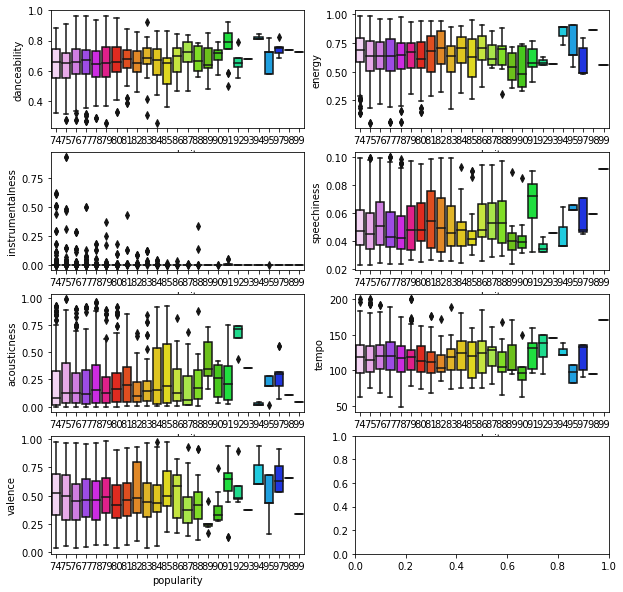

In [5]:
fig, axes = plt.subplots(4,2,figsize=(10,10))
sns.boxplot(x = 'popularity', y = 'danceability', data = sorted_one_df, palette="gist_ncar_r", ax = axes[0,0])
sns.boxplot(x = 'popularity', y = 'energy', data = sorted_one_df, palette="gist_ncar_r", ax = axes[0,1])
sns.boxplot(x = 'popularity', y = 'instrumentalness', data = sorted_one_df, palette="gist_ncar_r", ax = axes[1,0])
sns.boxplot(x = 'popularity', y = 'speechiness', data = sorted_one_df, palette="gist_ncar_r", ax = axes[1,1])
sns.boxplot(x = 'popularity', y = 'acousticness', data = sorted_one_df, palette="gist_ncar_r", ax = axes[2,0])
sns.boxplot(x = 'popularity', y = 'tempo', data = sorted_one_df, palette="gist_ncar_r", ax = axes[2,1])
sns.boxplot(x = 'popularity', y = 'valence', data = sorted_one_df, palette="gist_ncar_r", ax = axes[3,0])
plt.show()

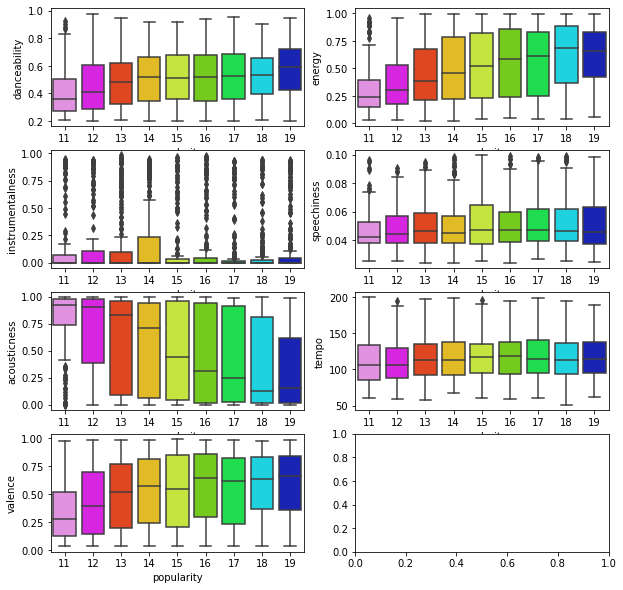

In [6]:
fig, axes = plt.subplots(4,2,figsize=(10,10))
sns.boxplot(x = 'popularity', y = 'danceability', data = sorted_two_df, palette="gist_ncar_r", ax = axes[0,0])
sns.boxplot(x = 'popularity', y = 'energy', data = sorted_two_df, palette="gist_ncar_r", ax = axes[0,1])
sns.boxplot(x = 'popularity', y = 'instrumentalness', data = sorted_two_df, palette="gist_ncar_r", ax = axes[1,0])
sns.boxplot(x = 'popularity', y = 'speechiness', data = sorted_two_df, palette="gist_ncar_r", ax = axes[1,1])
sns.boxplot(x = 'popularity', y = 'acousticness', data = sorted_two_df, palette="gist_ncar_r", ax = axes[2,0])
sns.boxplot(x = 'popularity', y = 'tempo', data = sorted_two_df, palette="gist_ncar_r", ax = axes[2,1])
sns.boxplot(x = 'popularity', y = 'valence', data = sorted_two_df, palette="gist_ncar_r", ax = axes[3,0])
plt.show()

In [7]:
my_model = sk.tree.DecisionTreeClassifier(criterion="gini")

In [8]:
features = ['acousticness', 'danceability','energy','instrumentalness','speechiness', 'tempo', 'valence']
X = df3[features]
y = df3['popularity']

In [9]:
my_model.fit(X, y)

DecisionTreeClassifier()

In [11]:
# text_representation = tree.export_text(my_model)
# print(text_representation)

In [13]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
model2 = sk.tree.DecisionTreeClassifier(criterion="gini")
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
prediction2 = model2.predict(X_test)
prediction2

array([78, 79, 80, ..., 76, 80, 17], dtype=int64)

In [18]:
df = pd.DataFrame(columns = ['class', 'predictions'])

In [19]:
df['class'] = y_test
df = df.reset_index(drop=True)

In [20]:
df['predictions'] = pd.Series(prediction2)
df

,class,predictions
0,84,78
1,77,79
2,79,80
3,11,78
4,76,76
...,...,...
1195,80,80
1196,14,76
1197,75,76
1198,84,80


In [21]:
sk.metrics.accuracy_score(prediction2, y_test)

0.3566666666666667

In [25]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)

In [26]:

dt.feature_importances_

array([0.18084344, 0.13699082, 0.14822956, 0.10281707, 0.15433722,
       0.13195174, 0.14483015])

In [32]:
xxx = ['energy','danceability']
X_s = df3[xxx]
y_s = df3['popularity']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s))

The accuracy of the Decision Tree is 0.35


In [33]:

from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.08166666666666667